# Exploratory Data Analysis - Telco Customer Churn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## initial visualization on data

In [14]:
df = pd.read_csv("../dataset/WA_Fn-UseC_-Telco-Customer-Churn.xls")

print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#cek missing values
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


no missing values

In [16]:
#drop unrelevant columns
df = df.drop(columns=["customerID"])
df = df.dropna(subset=['Churn'])

TotalCharges masih ke-detect sebagai object, padahal harusnya numeric (float).

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()  # cek apakah ada NaN setelah konversi


np.int64(11)

In [18]:
df = df.dropna(subset=['TotalCharges'])
#reset index
df = df.reset_index(drop=True)

checking unique values

In [19]:
for col in df.columns:
    print(col, df[col].unique()[:10])


gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [ 29.85  56.95  53.85  42.3   70.7   99.65  89.1   29.75 104.8   56.15]
TotalCharges [  29.85 1889.5   108.15 1840.75  151.65  820.5  1949.4   301.9  3046.05
 3487.95]
Churn ['No' 'Yes']


In [20]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

datanya imbalanced, cb cari tau kenapa, liat mana faktor yang paling beda antara customer churn vs nggak churn

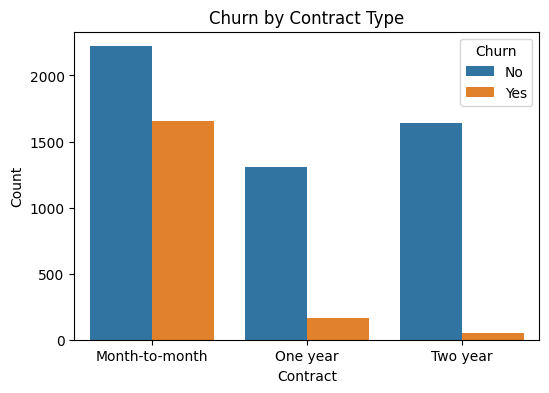

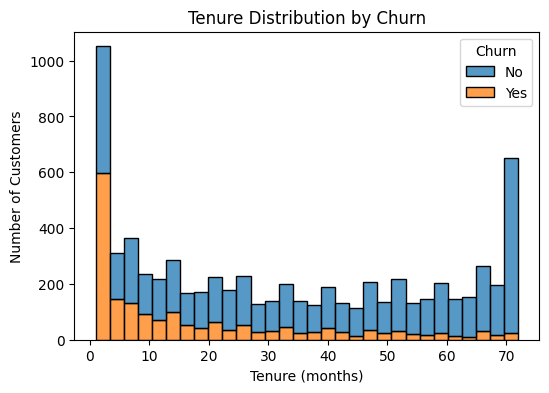

C:\Users\USER\AppData\Local\Temp\ipykernel_17568\1826457305.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True)


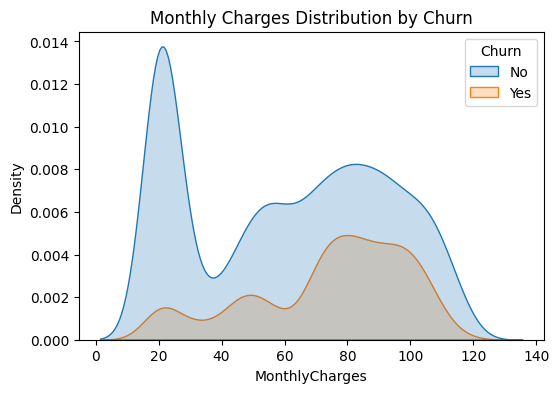

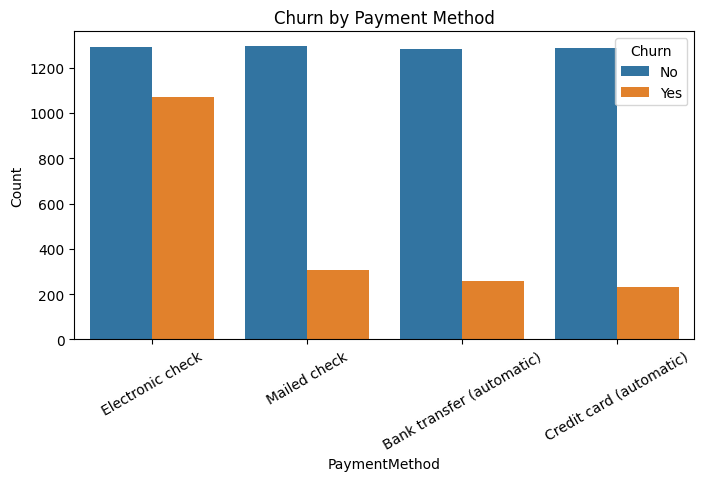

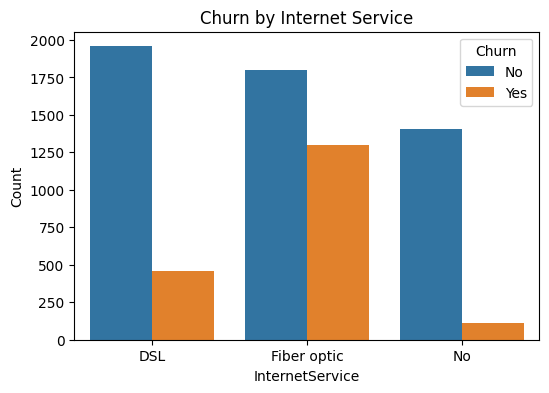

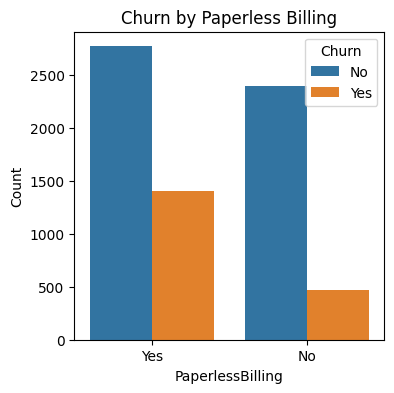

In [21]:
#contract
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.ylabel("Count")
plt.show()

#tenure 
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=False, multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

#monthly charges distribution
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


#payment method
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.show()

#internet service
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.ylabel("Count")
plt.show()

#paperless billing
plt.figure(figsize=(4,4))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title("Churn by Paperless Billing")
plt.ylabel("Count")
plt.show()


- Contract: month-to-month churn rate tinggi, one year dan two year churn rendah.
- Tenure: banyak churn terjadi di early months (0–12 bulan). Semakin lama stay, makin kecil kemungkinan churn.
- Monthly Charges: churn lebih tinggi di range biaya menengah–tinggi (sekitar 70–100+). Customer dengan biaya rendah relatif jarang churn.
- Payment Method: customer dengan Electronic check churn jauh lebih tinggi dibanding metode lain. Sementara yang pakai Bank transfer atau Credit card automatic churn-nya rendah (mungkin karena otomatis, jadi customer nggak ribet (or maybe they just forgot wkwk))
- Internet Service: fiber optic punya churn rate lebih tinggi dibanding DSL. Pelanggan tanpa internet service hampir nggak churn. Makes sense, kalau cuma langganan telpon/TV mereka lebih loyal.
- Paperless Billing: yang pilih Yes (paperless) churn lebih banyak. Bisa jadi karena pelanggan yang tech-savvy lebih demanding, jadi kalau ada masalah gampang pindah provider(?).

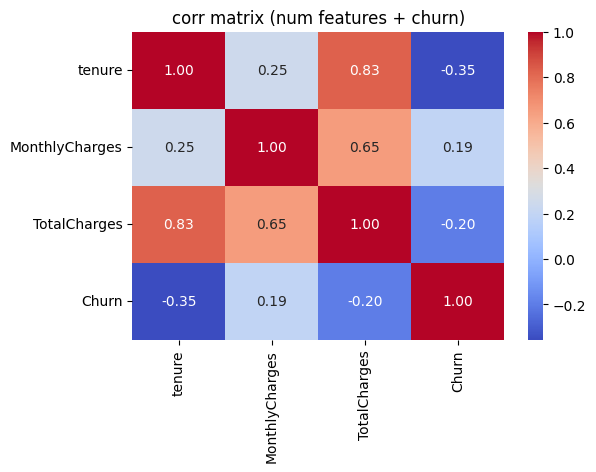

In [22]:
#copy
df_corr = df.copy()

#convert churn ke 0/1
df_corr['Churn'] = df_corr['Churn'].map({'No':0, 'Yes':1})

#numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

#correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(df_corr[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("corr matrix (num features + churn)")
plt.show()

cek outliers

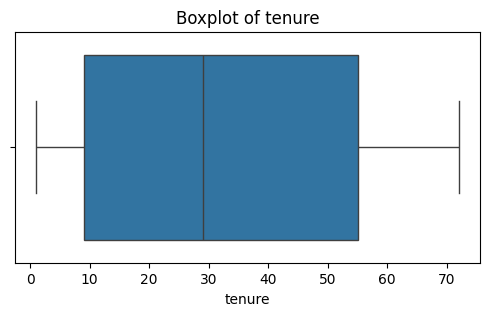

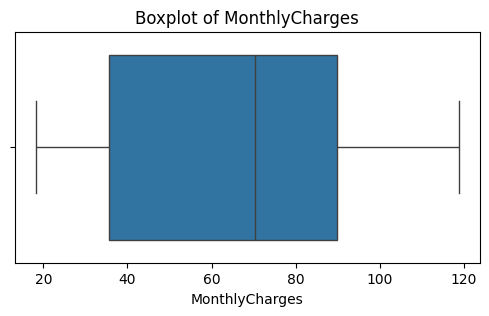

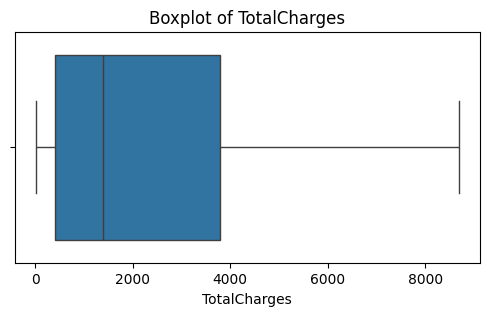

In [23]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# preprocessing & saving

In [24]:
#copy biar aman
df_proc = df.copy()

#ubah y/n ke 1/0
df_proc['Churn'] = df_proc['Churn'].map({'Yes': 1, 'No': 0})
#pisah categorical & numeric
cat_cols = df_proc.select_dtypes(include=['object']).columns.tolist()
num_cols = df_proc.select_dtypes(include=['int64', 'float64']).columns.tolist()



#pastikan churn ngga ke encode
cat_cols = [col for col in cat_cols if col != 'Churn']

#One-hot encoding
df_encoded = pd.get_dummies(df_proc, columns=cat_cols, drop_first=True)

#save
df_encoded.to_csv("../dataset/cleanedData.csv", index=False)

print(df_encoded.shape)

(7032, 31)


to note: data masih imbalanced